In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
'''
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
'''

"\nmnist = np.load('mnist.npz')\nx_train = mnist['x_train']\ny_train = mnist['y_train']\nx_test = mnist['x_test']\ny_test = mnist['y_test']\n"

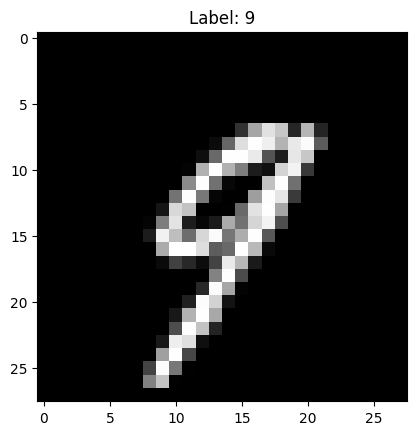

In [ ]:
index = 7245
plt.title(f'Label: {y_train[index]}')
plt.imshow(x_train[index], cmap='gray')
plt.show()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
y_test[10]

0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
print('Train Shape:', x_train.shape)
print('Test Shape:', x_test.shape)
print('Images in Train:', x_train.shape[0])
print('Images in Test:', x_test.shape[0])
print('Max Value in Train:', x_train.max())
print('Min Value in Train:', x_train.min())

Train Shape: (60000, 28, 28, 1)
Test Shape: (10000, 28, 28, 1)
Images in Train: 60000
Images in Test: 10000
Max Value in Train: 1.0
Min Value in Train: 0.0


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print('y_train[10]:', y_train[10])
print('y_train_cat[10]:', y_train_cat[10])

y_train[10]: 3
y_train_cat[10]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,
                 activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=3,
                 activation='relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='adam')
model.fit(x=x_train, y=y_train_cat,
          batch_size=32, epochs=15, validation_split=0.3)

Epoch 1/15
1313/1313 [==============================] - 114s 86ms/step - loss: 0.1316 - accuracy: 0.9601 - val_loss: 0.0713 - val_accuracy: 0.9776
Epoch 2/15
1313/1313 [==============================] - 113s 86ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.0532 - val_accuracy: 0.9835
Epoch 3/15
1313/1313 [==============================] - 113s 86ms/step - loss: 0.0222 - accuracy: 0.9925 - val_loss: 0.0642 - val_accuracy: 0.9839
Epoch 4/15
1313/1313 [==============================] - 114s 87ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0793 - val_accuracy: 0.9818
Epoch 5/15
1313/1313 [==============================] - 112s 85ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0596 - val_accuracy: 0.9854
Epoch 6/15
1313/1313 [==============================] - 113s 86ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0840 - val_accuracy: 0.9847
Epoch 7/15
1313/1313 [==============================] - 110s 84ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 5s 15ms/step - loss: 0.0852 - accuracy: 0.9864


[0.08520010113716125, 0.9864000082015991]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Dense

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu',
          input_shape=(28, 28, 1)))

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(rate=0.2))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='adam')

callback = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=2
)

model2.fit(x=x_train, y=y_train_cat,
          batch_size=32, epochs=15,
          validation_data=(x_test, y_test_cat),
          callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 135s 71ms/step - loss: 0.0855 - accuracy: 0.9740 - val_loss: 0.0492 - val_accuracy: 0.9838
Epoch 2/15
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 3/15
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0574 - val_accuracy: 0.9805


In [ ]:
model2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 4s 13ms/step - loss: 0.0574 - accuracy: 0.9805


[0.057373955845832825, 0.9804999828338623]

1/1 [==============================] - 0s 23ms/step
y_test[32]: 3
y_test_cat[32]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


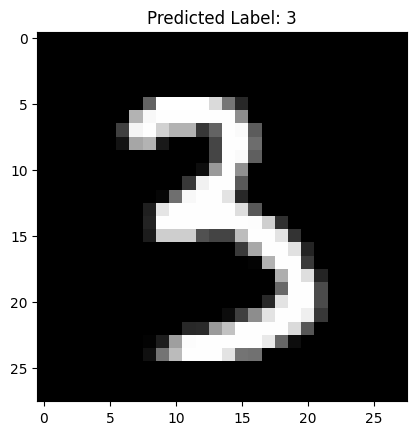

In [ ]:
plt.imshow(x_test[32].reshape(28, 28), cmap='gray')
y_pred = model.predict(x_test[32].reshape(1, 28, 28, 1))
print('y_test[32]:', y_test[32])
print('y_test_cat[32]:', y_test_cat[32])
plt.title(f'Predicted Label: {y_pred.argmax()}')
plt.show()